In [1]:
import mglearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge   # 릿지회귀
import pandas as pd

In [2]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge   # 릿지회귀

In [4]:
boston = load_boston()

df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 단순선형 회귀

In [10]:
#sel = ['INDUS',''RM]
sel = df_boston.columns[:-2]
X = df_boston[sel]
y = df_boston['target']
test_X = df_test[sel]

NameError: name 'df_test' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
model.coef_, model.intercept_

In [ ]:
print('학습 데이터 셋 : ', model.score(X_train, y_train))
print('테스트 데이터 셋 : ', model.score(X_test, y_test))

In [ ]:
df_boston.plot(kind='bar')

In [ ]:
X.columns, X.shape

In [ ]:
ex_X = PolynomialFeatures(degree=2,
         include_bias=False).fit_transform(X)  # 데이터 feature 추가 생성
ex_X.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("훈련 데이터 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

In [6]:
import numpy as np
# sel = ["INDUS",'RM']
sel = df_boston.columns[ : -1]
X = df_boston[sel]       # 입력
y = df_boston['target']    # 출력

In [7]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("훈련 데이터 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

NameError: name 'ex_X' is not defined

In [8]:
from sklearn.linear_model import Lasso, Ridge # Lasso : L1, Ridge: L2
lasso = Lasso(alpha=0.01).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))

NameError: name 'X_train' is not defined

In [9]:
from sklearn.linear_model import Lasso, Ridge # Lasso : L1, Ridge: L2
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

NameError: name 'X_train' is not defined

학습 :  0.8932722454770061
테스트 :  0.7017032183744041
학습 :  0.8766999716356483
테스트 :  0.6801153575314898


(-200.0, 200.0)

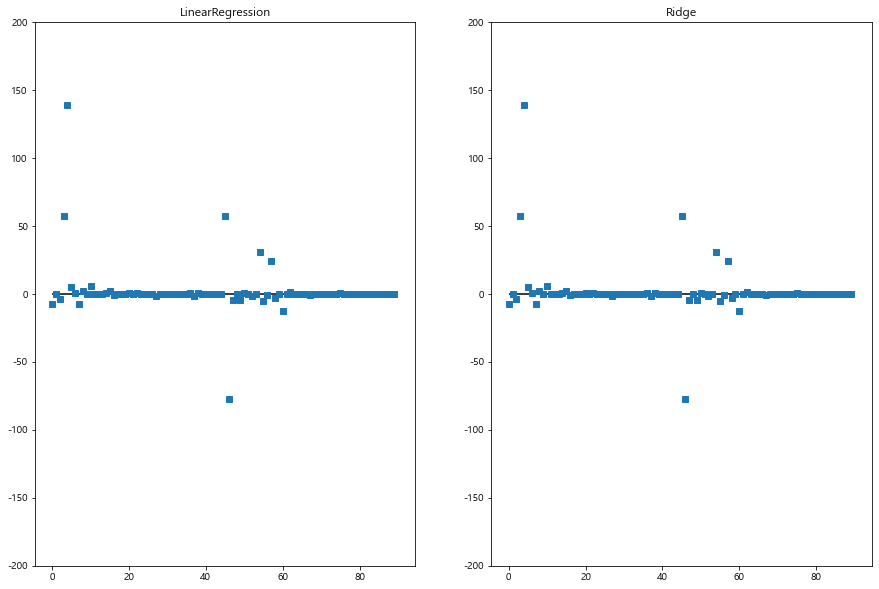

In [36]:
# Ridge - L2규제, 0에 가깝게 만들지만, 0이 되는 친구는 없다.
lr = LinearRegression().fit(X_train, y_train)
print("학습 : ", lr.score(X_train, y_train) )
print("테스트 : ", lr.score(X_test, y_test) )
# Ridge - L2규제, 0에 가깝게 만들지만, 0이 되는 친구는 없다.
ridge = Ridge().fit(X_train, y_train)
print("학습 : ", ridge.score(X_train, y_train) )
print("테스트 : ", ridge.score(X_test, y_test) )
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.hlines(0,0, len(lr.coef_))
plt.plot(lr.coef_, 's', label="LinearRegression")
plt.title('LinearRegression')
plt.ylim(-200,200)
plt.subplot(1, 2, 2)
plt.hlines(0,0, len(lr.coef_))
plt.plot(lr.coef_, 's', label="Ridge")
plt.title('Ridge')
plt.ylim(-200,200)

In [34]:
##위의 결과값과 아래 결과값이 다른 이유 확인해보기
# sel = ["INDUS",'RM']
sel = df_boston.columns[ : -1]
X = df_boston[sel]       # 입력
y = df_boston['target']    # 출력
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("훈련 데이터 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))
from sklearn.linear_model import Lasso, Ridge # Lasso : L1, Ridge: L2
lasso = Lasso(alpha=0.01).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
from sklearn.linear_model import Lasso, Ridge # Lasso : L1, Ridge: L2
ridge = Ridge(alpha=0.01).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.89
테스트 데이터 세트 점수 : 0.70
학습용 데이터 세트 점수 : 0.87
테스트 데이터 세트 점수 : 0.70
학습용 데이터 세트 점수 : 0.89
테스트 데이터 세트 점수 : 0.70


C:\Users\wnsau\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2382.1471595185108, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(
